## Packages

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## Functions

In [13]:
def distribute_points(degree: np.ndarray) -> np.ndarray:
  """Distribute initial roots in an unit circle in the complex plane.
  
  Parameters
  ----------
  degree: nd.ndarray
    Polynomial degree.

  Returns
  -------
  result: nd.ndarray
    Complex array with initial roots distributed.
  """
  roots = np.zeros(degree, dtype=complex)
  img = complex(0, 1)
  rad = 1
  phi = 2.0 * np.pi / degree
  for k in range(degree):
    roots[k] = complex(rad, 0) * np.exp(img*complex(phi*k, 0.0))
  return roots

def durand_kerner(func,
                  degree: int,
                  iterations: int = 10,
                  epsilon: float = 1.0e-16) -> np.ndarray:
  """Durand-kerner root finding algorithm.

  Parameters
  ----------
  func:
    Callback function to evaluate polynomial.

  degree: int 
    Polynomial degree.

  iterations: int
    Maximmum number of iterations.

  epsilon: float
    Limit to accept convergence.

  Returns
  -------
  np.ndarray
    Founded roots.
  """
  roots = distribute_points(degree=degree)
  n = degree
  new_roots = np.zeros(n, dtype=complex)
  for iterations in range(iterations):
    for k in range(n):
      denominator = complex(1,0)
      for i in range(n):
        if i != k:
          denominator *= (roots[k] - roots[i])
      new_roots[k] = roots[k] - (func(roots[k])/denominator)
    roots[:] = new_roots
  return new_roots

## Plotting everything

Iterations: 10
Raiz #1: (-0.6094855680727302-3.8234205867178855e-57j)
Raiz #2: (0.7811618746906088+0.7361730535793543j)
Raiz #3: (-0.07502382746891878+1.1203892360470722j)
Raiz #4: (-0.9013952631853249+0.5629115325067967j)
Raiz #5: (-0.9013952631853249-0.5629115325067967j)
Raiz #6: (-0.07502382746891878-1.1203892360470722j)
Raiz #7: (0.7811618746906088-0.7361730535793543j)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.


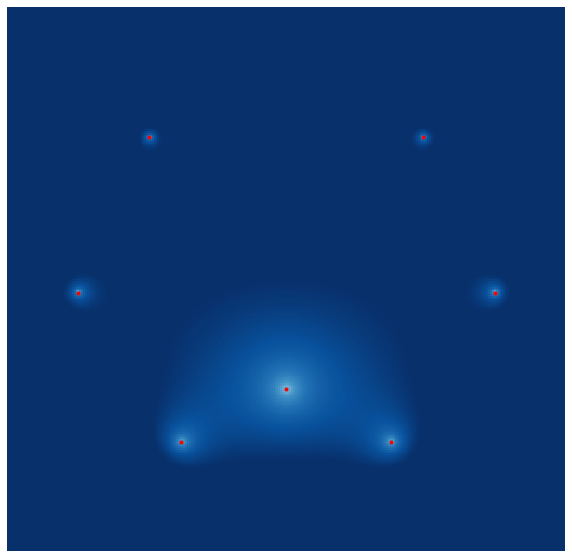

In [14]:
def f(z):
    return z**7 + z**6 + z**5 + z**4 + z**3 + z**2 + 2*z + 1

                                                                                                                                                    
iterations = 10                                                                                                                                                                                
new_roots = durand_kerner(func=f, degree=7, iterations=iterations)
    
print("Iterations: {}". format(iterations))
for i, j in enumerate(new_roots):
    print(f"Raiz #{i+1}: {complex(j)}")

# Create complex sample data
minval = -1.5
maxval = 1.5
step = 0.01

datareal = np.arange(minval, maxval+step, step)
dataimag = datareal * 1j

cmplxarray = np.zeros((datareal.size, datareal.size), dtype=complex)

for i in range(datareal.size):
    for k in range(datareal.size):
        cmplxarray[i,k] = f(datareal[i] + dataimag[k])


# Plot
fig, ax = plt.subplots(1, figsize=[10,10])
ax.set_axis_off()

pcm = ax.pcolormesh(datareal, datareal, np.abs(cmplxarray),
                    norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
                                            vmin=-1.0, vmax=1.0),
                    cmap='Blues')

for i in range(len(new_roots)):
    im = ax.plot(new_roots[i].imag, new_roots[i].real, color="red", marker="o", markersize=3)



plt.show()